<a href="https://colab.research.google.com/github/layann444/LayanAi/blob/main/final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random
import pandas as pd

# Simulate one game session
def simulate_game():
    moves = random.randint(10, 30)
    mistakes = random.randint(0, 10)
    time = random.randint(50, 200)
    return {"moves": moves, "mistakes": mistakes, "time": time}

# Simulate 50 players
game_data = [simulate_game() for _ in range(50)]

# Create DataFrame
df = pd.DataFrame(game_data)
df.head()


,moves,mistakes,time
0,16,10,108
1,30,1,124
2,17,2,91
3,18,9,58
4,23,9,88


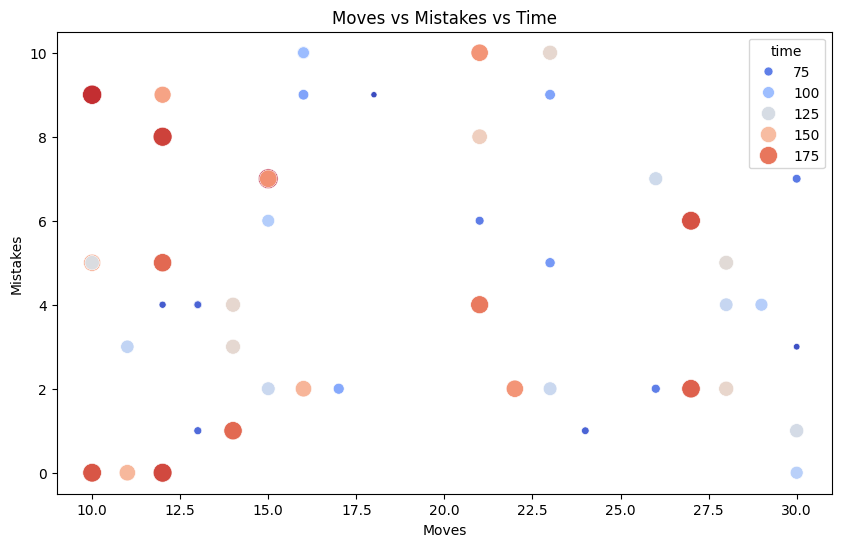

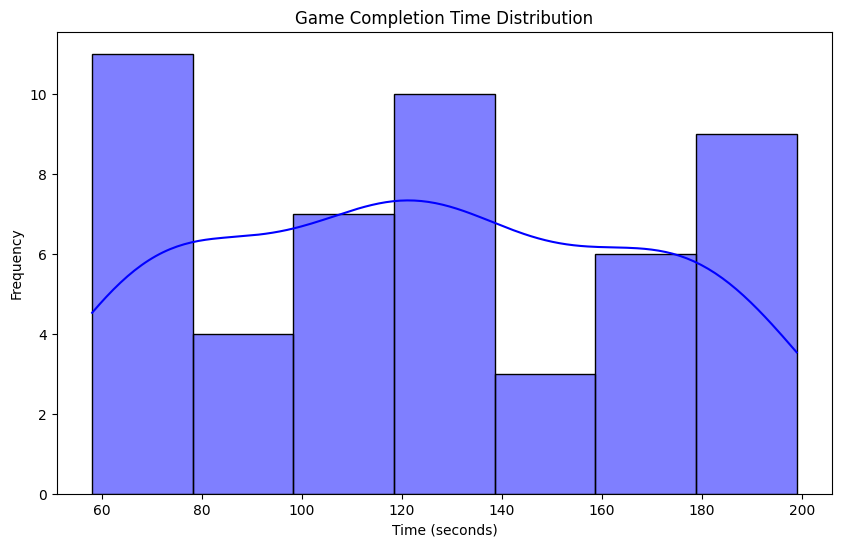

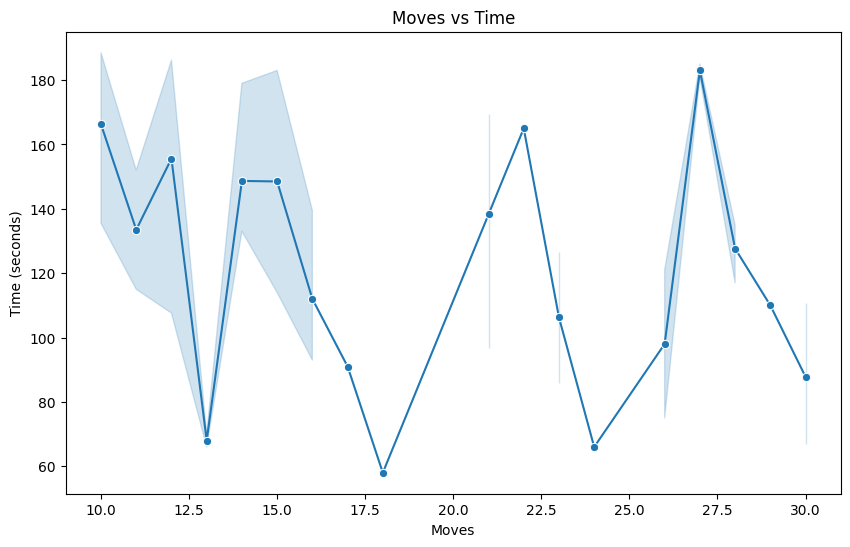

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: moves vs mistakes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="moves", y="mistakes", hue="time", palette="coolwarm", size="time", sizes=(20, 200))
plt.title("Moves vs Mistakes vs Time")
plt.xlabel("Moves")
plt.ylabel("Mistakes")
plt.show()

# Histogram: game completion time
plt.figure(figsize=(10, 6))
sns.histplot(df['time'], kde=True, color='blue')
plt.title("Game Completion Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

# Line plot: moves vs time
plt.figure(figsize=(10, 6))
sns.lineplot(x="moves", y="time", data=df, marker="o")
plt.title("Moves vs Time")
plt.xlabel("Moves")
plt.ylabel("Time (seconds)")
plt.show()


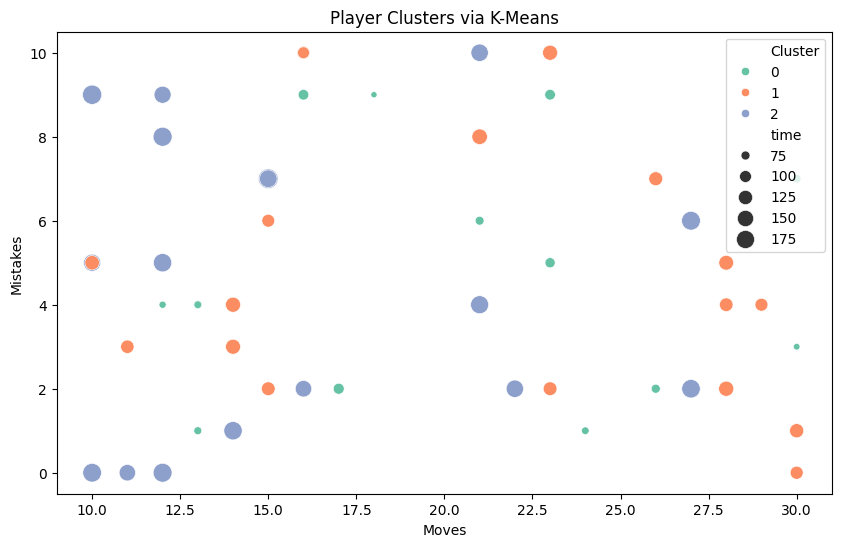

In [7]:
from sklearn.cluster import KMeans

# Clustering based on all metrics
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['moves', 'mistakes', 'time']])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="moves", y="mistakes", hue="Cluster", palette="Set2", size="time", sizes=(20, 200))
plt.title("Player Clusters via K-Means")
plt.xlabel("Moves")
plt.ylabel("Mistakes")
plt.show()


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Binary label: 1 = good player, 0 = struggling player
df['label'] = (df['mistakes'] < 5).astype(int)

# Features and labels
X = df[['moves', 'mistakes', 'time']]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


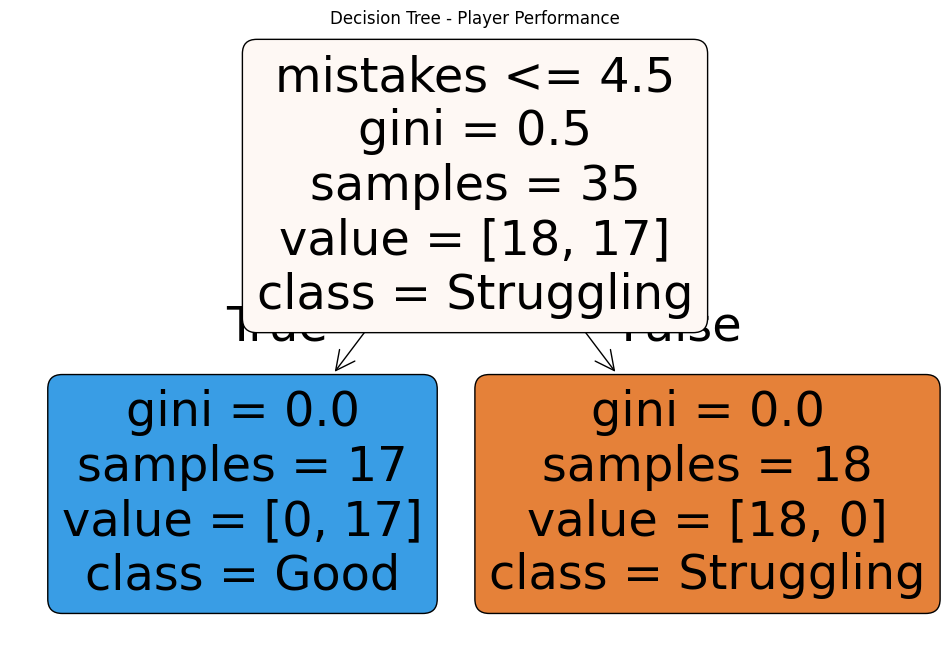

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['moves', 'mistakes', 'time'], class_names=['Struggling', 'Good'], rounded=True)
plt.title("Decision Tree - Player Performance")
plt.show()
